
    1. ✔ Escolha de uma base de dados de um problema de aprendizado supervisionado; 
    2. Verificação dos relacionamentos entre as variáveis por meio das ferramentas gráficas;
    3. Escolha um modelo de aprendizado supervisionado para resolver o problema proposto pela base de dados escolhida;
    4. Realização de transformações nos dados da base;
    5. Avaliação do impacto das transformações previstas na etapa anterior no desempenho do modelo supervisionado.



In [111]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
%matplotlib inline 

In [112]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

    Análise das relações entre as variáveis

Utilizando o dataset TRAIN.CSV, analisaremos individualmente os valores de cada coluna para tentar perceber alguma correlação com a variável de saída
desejada (Se o paciente sobreviveu ou não.)

Análise de sobreviventes por sexo


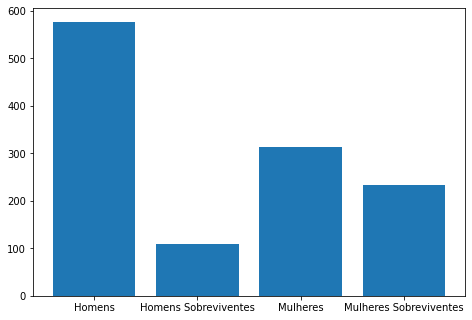

In [113]:
qtdPassenger = len(train.index)
qtdMale = len(train[train['Sex'] == 'male'])
qtdFemale = len(train[train['Sex'] == 'female'])

survived = train[train['Survived'] == 1]
maleSurvived = survived[survived['Sex'] == 'male']
femaleSurvived = survived[survived['Sex'] == 'female']

dead = train[train['Survived'] == 0]
maleDead = dead[dead['Sex'] == 'male']
femaleDead = dead[dead['Sex'] == 'female']

qtdSurvived = len(survived.index)
qtdMaleSurvived = len(maleSurvived.index)
qtdFemaleSurvived = len(femaleSurvived.index)

qtdDead = len(dead.index)
qtdMaleDead = len(maleDead.index)
qtdFemaleDead = len(femaleDead.index)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Homens', 'Homens Sobreviventes', 'Mulheres', 'Mulheres Sobreviventes']
values = [qtdMale, qtdMaleSurvived, qtdFemale, qtdFemaleSurvived]
ax.bar(labels,values)
plt.show()

Passageiros Por Classe

In [114]:
firstClass = train[train['Pclass'] == 1]
secondClass = train[train['Pclass'] == 2]
thirdClass = train[train['Pclass'] == 3]

firstClassSurvivors = firstClass[firstClass['Survived'] == 1]
secondClassSurvivors = secondClass[secondClass['Survived'] == 1]
thirdClassSurvivors = thirdClass[thirdClass['Survived'] == 1]

qtdFirstClass = len(firstClass.index)
qtdSecondClass = len(secondClass.index)
qtdThirdClass = len(thirdClass.index)

qtdFirstClassSurvived = len(firstClassSurvivors.index)
qtdSecondClassSurvived = len(secondClassSurvivors.index)
qtdThirdClassSurvived = len(thirdClassSurvivors.index)

pctgFirstClassSurvived = (qtdFirstClassSurvived/qtdFirstClass) * 100
pctgSecondClassSurvived = (qtdSecondClassSurvived/qtdSecondClass) * 100
pctgThirdClassSurvived = (qtdThirdClassSurvived/qtdThirdClass) * 100

print('Porcentagem sobrevivência 1ª classe: ' + "{:.2f}".format(pctgFirstClassSurvived) + '%')
print('Porcentagem sobrevivência 2ª classe: ' + "{:.2f}".format(pctgSecondClassSurvived) + '%')
print('Porcentagem sobrevivência 3ª classe: ' + "{:.2f}".format(pctgThirdClassSurvived) + '%')

Porcentagem sobrevivência 1ª classe: 62.96%
Porcentagem sobrevivência 2ª classe: 47.28%
Porcentagem sobrevivência 3ª classe: 24.24%


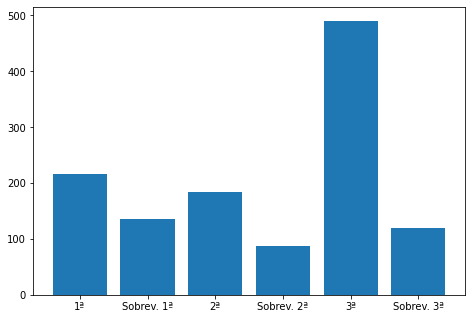

In [115]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['1ª', 'Sobrev. 1ª', '2ª', 'Sobrev. 2ª', '3ª', 'Sobrev. 3ª']
values = [qtdFirstClass, qtdFirstClassSurvived, qtdSecondClass, qtdSecondClassSurvived, qtdThirdClass, qtdThirdClassSurvived]
ax.bar(labels,values)
plt.show()


Sobreviventes por Classe

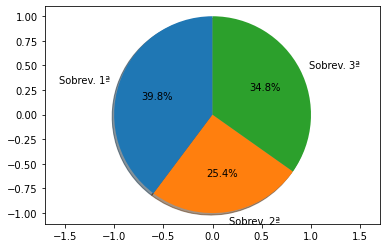

In [116]:
values = [qtdFirstClassSurvived, qtdSecondClassSurvived, qtdThirdClassSurvived]
labels=['Sobrev. 1ª', 'Sobrev. 2ª', 'Sobrev. 3ª']
explode = (0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, frame=True)
ax1.axis('equal')

plt.show()

Passageiros por idade

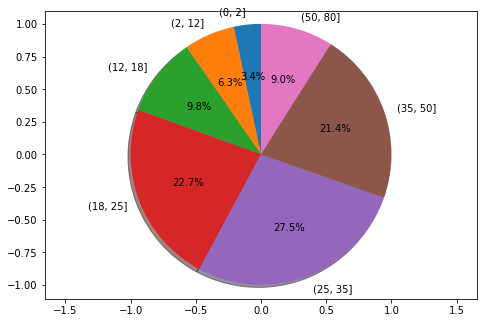

In [117]:
range = [0, 2, 12, 18, 25, 35, 50, 80]

idadeGeral = train['Age'].astype(float).groupby(pd.cut(train['Age'].astype(float), range)).count()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
values = idadeGeral.to_numpy()
legenda=[
    '(0, 2]',
    '(2, 12]',
    '(12, 18]',
    '(18, 25]',
    '(25, 35]',
    '(35, 50]',
    '(50, 80]'
]
ax.pie(values, labels=legenda, shadow=True, autopct='%1.1f%%', startangle=90, frame = True)

plt.show()

Sobreviventes por idade

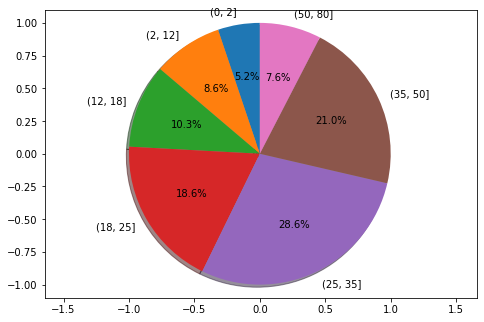

In [118]:
idadeSobreviventes = survived['Age'].astype(float).groupby(pd.cut(survived['Age'].astype(float), range)).count()
idadeMortos = test['Age'].astype(float).groupby(pd.cut(test['Age'].astype(float), range)).count()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
values = idadeSobreviventes.to_numpy()
legenda=[
    '(0, 2]',
    '(2, 12]',
    '(12, 18]',
    '(18, 25]',
    '(25, 35]',
    '(35, 50]',
    '(50, 80]'
]
ax.pie(values, labels=legenda, shadow=True, autopct='%1.1f%%', startangle=90, frame = True)

plt.show()

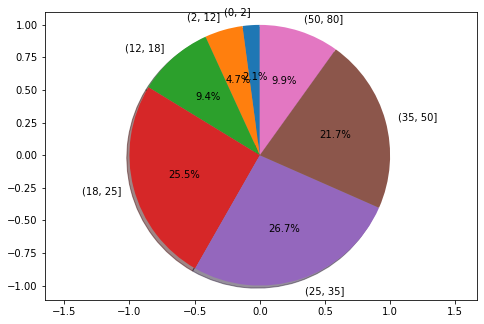

In [119]:
idadeMortos = dead['Age'].astype(float).groupby(pd.cut(dead['Age'].astype(float), range)).count()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
values = idadeMortos.to_numpy()
legenda=[
    '(0, 2]',
    '(2, 12]',
    '(12, 18]',
    '(18, 25]',
    '(25, 35]',
    '(35, 50]',
    '(50, 80]'
]
ax.pie(values, labels=legenda, shadow=True, autopct='%1.1f%%', startangle=90, frame = True)

plt.show()

In [120]:
print(idadeSobreviventes)
print(idadeGeral)
print(idadeMortos)

Age
(0, 2]      15
(2, 12]     25
(12, 18]    30
(18, 25]    54
(25, 35]    83
(35, 50]    61
(50, 80]    22
Name: Age, dtype: int64
Age
(0, 2]       24
(2, 12]      45
(12, 18]     70
(18, 25]    162
(25, 35]    196
(35, 50]    153
(50, 80]     64
Name: Age, dtype: int64
Age
(0, 2]        9
(2, 12]      20
(12, 18]     40
(18, 25]    108
(25, 35]    113
(35, 50]     92
(50, 80]     42
Name: Age, dtype: int64


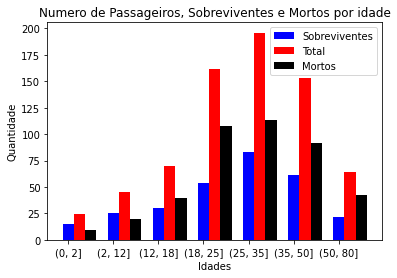

In [121]:
X = np.arange(len(idadeSobreviventes))
plt.bar(X, idadeSobreviventes, color = 'blue', width = 0.25)
plt.bar(X + 0.25, idadeGeral, color = 'red', width = 0.25)
plt.bar(X + 0.50, idadeMortos, color = 'black', width = 0.25)
plt.legend(['Sobreviventes', 'Total', 'Mortos'])# Overiding the x axis with the country names
label = ['(0, 2]', '(2, 12]', '(12, 18]', '(18, 25]', '(25, 35]', '(35, 50]', '(50, 80]']
plt.xticks(np.arange(7), label)
plt.title("Numero de Passageiros, Sobreviventes e Mortos por idade")# Namimg the x and y axis
plt.xlabel('Idades')
plt.ylabel('Quantidade')

plt.show()

In [122]:
#SibSp = amount of sibling/spouses on titanic
SibSpOverall = train['SibSp'].value_counts()
print(SibSpOverall)

SibSpSurvivors = survived['SibSp'].value_counts()
print(SibSpSurvivors)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64


In [123]:
#Parch = amount of parent/childs on titanic

ParChOverall = train['Parch'].value_counts()
print(ParChOverall)

ParChSurvivors = survived['Parch'].value_counts()
print(ParChSurvivors)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64


In [124]:
#Embarked = place where they embarked the titanic.

EmbarkedOverall = train.iloc[: , -1].value_counts()
print(EmbarkedOverall)

EmbarkedSurvivors = survived.iloc[:, -1].value_counts()
print(EmbarkedSurvivors)


S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    217
C     93
Q     30
Name: Embarked, dtype: int64


In [125]:
#fare
ranges = 5

fareOverall = train['Fare'].astype(float).groupby(pd.cut(train['Fare'].astype(float), ranges)).count()
print(fareOverall)

#too many abusrd or irrelevant fare values; just drop the column. Not meaningful.

Fare
(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(307.398, 409.863]      0
(409.863, 512.329]      3
Name: Fare, dtype: int64


In [126]:
#cabin might be meaningful grouped by letter OR number? 

letterCabins = train['Cabin'].str[:1]
#print(letterCabins.value_counts())

letterCabinsSurvived = survived['Cabin'].str[:1]
#print(letterCabinsSurvived.value_counts())

#too many null values - only 200 people put their cabins in the response, out of the 891 total, which is just about ~25%. A column that 
#is only relevant for 25% of the database can be dropped.

deadAndNullCabin = len(train[train['Cabin'].isnull() & train['Survived'] == 0].index)
survivedAndNullCabin = len(train[train['Cabin'].isnull() & train['Survived'] == 1].index)

percentDeadAndNullCabin = (deadAndNullCabin / len(train[train['Cabin'].isnull()].index)) * 100
percentSurvivedAndNullCabin = (survivedAndNullCabin / len(train[train['Cabin'].isnull()].index)) * 100

percentSurvived = (len(survived.index) / len(train.index)) * 100
percentDead = (len(train[train['Survived'] == 0].index) / len(train.index)) * 100

print('Percentage of dead people with null cabins: ' + "{:.2f}".format(percentDeadAndNullCabin) + '%')
print('Percentage of survived people with null cabins: ' + "{:.2f}".format(percentSurvivedAndNullCabin) + '%')
print('Percentage of dead people: ' + "{:.2f}".format(percentDead) + '%')
print('Percentage of survived people: ' + "{:.2f}".format(percentSurvived) + '%')



Percentage of dead people with null cabins: 99.71%
Percentage of survived people with null cabins: 29.99%
Percentage of dead people: 61.62%
Percentage of survived people: 38.38%


In [129]:
#age and sex -> high importance
#parch and sibsp -> medium to low
#fare, embarked, cabin, Ticket -> not enough info out of the data
#name and passenger ID -> meaningless.
#in other words, we can almost entirely drop name, passengerID, cabin, ticket, fare and embarked columns to train our dataset better...
trainingSet = train
trainingSet['CabinIsNull'] = 0
trainingSet['CabinIsNull'] = np.where(trainingSet['Cabin'].isnull(), 1, trainingSet['CabinIsNull'])
trainingSet = trainingSet.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']) #this is the end CSV for the training.
trainingSet['Sex'].replace("female", "2", regex=True, inplace=True)
trainingSet['Sex'].replace("male", "1", regex=True, inplace=True)
trainingSet['Sex'] = trainingSet['Sex'].astype(int)
X = trainingSet.drop(columns=['Survived'])
Y = trainingSet['Survived']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
xgb = XGBClassifier(max_depth = 6, learning_rate = 0.05, seed = 93821)

xgb.fit(X_train, Y_train)
xgb.score(X_test, Y_test)


[00:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\wills\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\wills\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.7937219730941704

In [130]:
testPredicts = test
testPredicts['CabinIsNull'] = 0
testPredicts['CabinIsNull'] = np.where(testPredicts['Cabin'].isnull(), 1, testPredicts['CabinIsNull'])
testPredicts['Sex'].replace("female", "2", regex=True, inplace=True)
testPredicts['Sex'].replace("male", "1", regex=True, inplace=True)
testPredicts['Sex'] = testPredicts['Sex'].astype(int)
testPredicts = testPredicts.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

predictions = xgb.predict(testPredicts)
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})
submission.to_csv('submission.csv',index=False)


C:\Users\wills\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
